# Training Trainers
### Authors: Nigel Nelson and Colin Quinn
## Research Question:
- What features are most predictive of injuries in long distance runners
- Can a injury prediction model be made accurate enough to provide meaningful insight on training protocols
## Hypothesis:
- The greater the perceived exertion an athlete reports, the higher the probability that later training sessions result in injury.
- Training data collected on athletes closer to an injury is more preditive than training data collected in greater advance.

## The Dataset:
- The data set consists of a detailed training log from a Dutch high-level running team over a period of seven years (2012-2019). Included are the middle and long distance runners of the team, that is, those competing on distances between the 800 meters and the marathon. This design decision is motivated by the fact that these groups have strong endurance based components in their training, making their training regimes comparable. The data set contains 42,766 entries from 74 runners, of whom 27 are women and 47 are men. Each entry in the data set corresponds to a single athlete and a week of their training which is comprised of 10 features recorded for 7 days leading up to a potential injury. The 10 daily features are: Number of training sessions, total distance ran, distance ran at low heart rate intensity, distance ran at medium heart rate intensity, distance ran at high heart rate intensity, number of strength training sessions, hours of alternative training (such as cycling or swimming), percieved exertion (how exhausted the athlete at completion of training), percieved training success (how well the athlete felt training went that day), perceived recovery (how recovered the athlete felt before beginning training), and a lastly an injury flag that indicates whether the 7 days of training recorded resulted in in injury that prevented the athlete from completing a training session.

## Data Preprocessing:
### Imports:

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

In [143]:
day_data = pd.read_csv("dataverse_files\day_approach_maskedID_timeseries.csv",
dtype={'nr. sessions': 'category',
'nr. sessions.1': 'category',
'nr. sessions.2': 'category',
'nr. sessions.3': 'category',
'nr. sessions.4': 'category',
'nr. sessions.5': 'category',
'nr. sessions.6': 'category',
'strength training': 'category',
'strength training.1': 'category',
'strength training.2': 'category',
'strength training.3': 'category',
'strength training.4': 'category',
'strength training.5': 'category',
'strength training.6': 'category',
'injury': 'category'})
day_data.head()

for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    km_Z3 = 'km Z3-4' + suffix
    km_Z5 = 'km Z5-T1-T2' + suffix
    km_sprinting = 'km sprinting' + suffix
    low_inten = 'km low-intensity' + suffix
    med_inten = 'km medium-intensity' + suffix
    hgih_inten = 'km high-intensity' + suffix

    day_data.rename(columns = {km_Z3: low_inten,
                            km_Z5: med_inten,
                            km_sprinting: hgih_inten},
                            inplace = True)

categorical_features = ['nr.sessions','strength training']

In [144]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42766 entries, 0 to 42765
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   nr. sessions                 42766 non-null  category
 1   total km                     42766 non-null  float64 
 2   km low-intensity             42766 non-null  float64 
 3   km medium-intensity          42766 non-null  float64 
 4   km high-intensity            42766 non-null  float64 
 5   strength training            42766 non-null  category
 6   hours alternative            42766 non-null  float64 
 7   perceived exertion           42766 non-null  float64 
 8   perceived trainingSuccess    42766 non-null  float64 
 9   perceived recovery           42766 non-null  float64 
 10  nr. sessions.1               42766 non-null  category
 11  total km.1                   42766 non-null  float64 
 12  km low-intensity.1           42766 non-null  float64 
 13  k

In [145]:
pvalues = {}

for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "nr. sessions" + suffix
    combination_counts = day_data.value_counts(subset=["injury", col]).unstack(level=0).fillna(0)
    chi2, p, _, _ = stats.chi2_contingency(combination_counts)
    pvalues[col] = p

In [146]:
for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "total km" + suffix
    samples_by_group = []
    for value in set(day_data["injury"]):
        mask = day_data["injury"] == value
        samples_by_group.append(day_data[col][mask])
    stat, p = stats.kruskal(*samples_by_group)
    pvalues[col] = p


In [147]:
for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "km medium-intensity" + suffix
    samples_by_group = []
    for value in set(day_data["injury"]):
        mask = day_data["injury"] == value
        samples_by_group.append(day_data[col][mask])
    stat, p = stats.kruskal(*samples_by_group)
    pvalues[col] = p

In [148]:
for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "km medium-intensity" + suffix
    samples_by_group = []
    for value in set(day_data["injury"]):
        mask = day_data["injury"] == value
        samples_by_group.append(day_data[col][mask])
    stat, p = stats.kruskal(*samples_by_group)
    pvalues[col] = p


In [149]:
for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "km high-intensity" + suffix
    samples_by_group = []
    for value in set(day_data["injury"]):
        mask = day_data["injury"] == value
        samples_by_group.append(day_data[col][mask])
    stat, p = stats.kruskal(*samples_by_group)
    pvalues[col] = p

In [150]:
for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "strength training" + suffix
    combination_counts = day_data.value_counts(subset=["injury", col]).unstack(level=0).fillna(0)
    chi2, p, _, _ = stats.chi2_contingency(combination_counts)
    pvalues[col] = p

In [151]:
for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "hours alternative" + suffix
    samples_by_group = []
    for value in set(day_data["injury"]):
        mask = day_data["injury"] == value
        samples_by_group.append(day_data[col][mask])
    stat, p = stats.kruskal(*samples_by_group)
    pvalues[col] = p

In [152]:
# Only uses days where training occured
temp_df = day_data[day_data["perceived exertion"] != -.01]

for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "perceived exertion" + suffix
    samples_by_group = []
    for value in set(day_data["injury"]):
        mask = day_data["injury"] == value
        samples_by_group.append(day_data[col][mask])
    stat, p = stats.kruskal(*samples_by_group)
    pvalues[col] = p

In [153]:
for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "perceived trainingSuccess" + suffix
    samples_by_group = []
    for value in set(day_data["injury"]):
        mask = day_data["injury"] == value
        samples_by_group.append(day_data[col][mask])
    stat, p = stats.kruskal(*samples_by_group)
    pvalues[col] = p

In [154]:
for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "perceived recovery" + suffix
    samples_by_group = []
    for value in set(day_data["injury"]):
        mask = day_data["injury"] == value
        samples_by_group.append(day_data[col][mask])
    stat, p = stats.kruskal(*samples_by_group)
    pvalues[col] = p

In [155]:
pvalues = dict(sorted(pvalues.items(), key=lambda item: item[1], reverse=True))

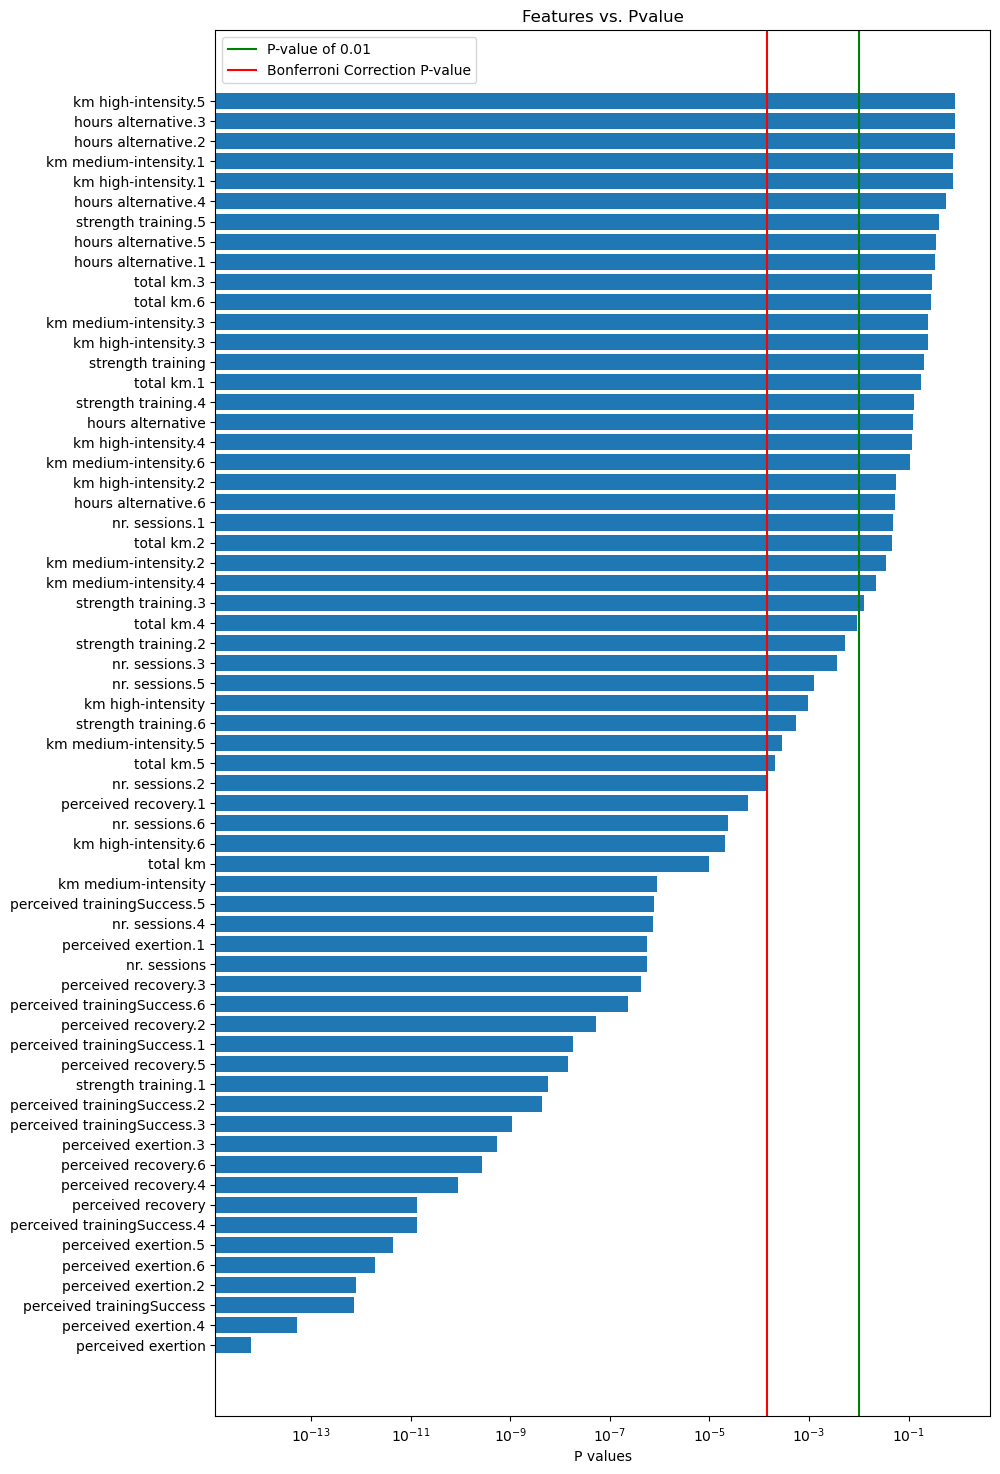

In [156]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
features = pvalues.keys()
y_pos = np.arange(len(features))

ax.barh(y_pos, pvalues.values(), align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(features)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('P values')
ax.set_title('Features vs. Pvalue')
ax.set_xscale('log')
fig.set_size_inches(10, 18)

plt.axvline(x=0.01, c='g', label="P-value of 0.01")
plt.axvline(x=0.01/70, c='r', label="Bonferroni Correction P-value")
plt.legend()

### Applying Bonferroni Correction
- The Bonferroni correction method was chosen to control the familywise error rate.

In [157]:
stat_sig_features = []
for feat, pvalue in pvalues.items():
    if pvalue < .01:
        stat_sig_features.append(feat)


sig_features = day_data[stat_sig_features]



---
### Plotting the most predictive features:

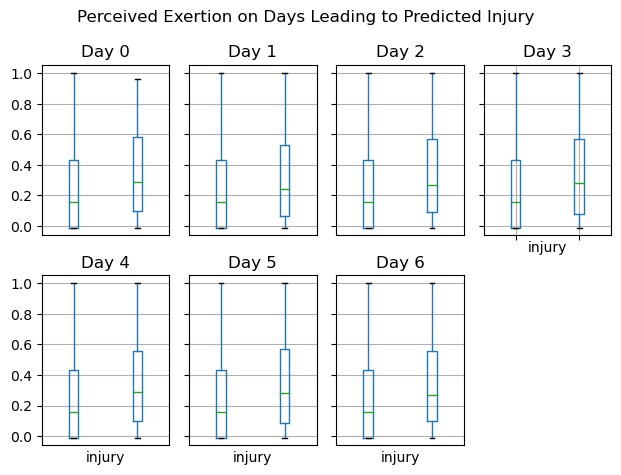

In [158]:
fig, ax = plt.subplots(2, 4, sharex='col', sharey='row')
i = 0
for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "perceived exertion" + suffix
    day_data.boxplot(column=col, by='injury', ax=ax.flatten()[i])
    ax.flatten()[i].title.set_text(f'Day {i}')

    i = i + 1

ax[1,3].axis('off')
ax[0,0].set_xticks([])
ax[0,1].set_xticks([])
ax[0,2].set_xticks([])
ax[0,0].set_xlabel("")
ax[0,1].set_xlabel("")
ax[0,2].set_xlabel("")
plt.suptitle('Perceived Exertion on Days Leading to Predicted Injury')
plt.tight_layout()

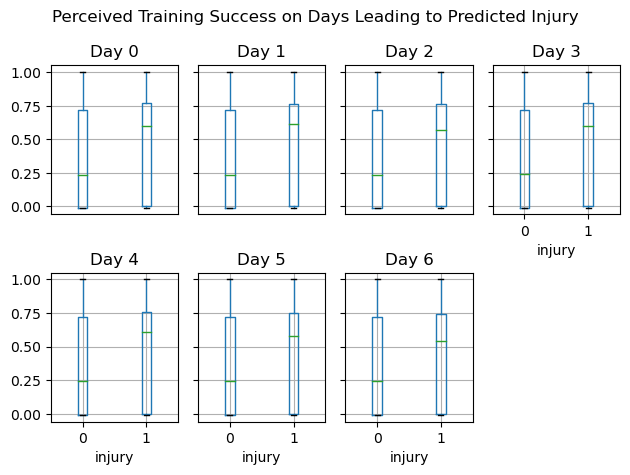

In [159]:
fig, ax = plt.subplots(2, 4, sharey='row')
i = 0
for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "perceived trainingSuccess" + suffix
    day_data.boxplot(column=col, by='injury', ax=ax.flatten()[i])
    ax.flatten()[i].title.set_text(f'Day {i}')

    i = i + 1

ax[1,3].axis('off')
ax[0,0].set_xticks([])
ax[0,1].set_xticks([])
ax[0,2].set_xticks([])
ax[0,0].set_xlabel("")
ax[0,1].set_xlabel("")
ax[0,2].set_xlabel("")

plt.suptitle('Perceived Training Success on Days Leading to Predicted Injury')
plt.tight_layout()

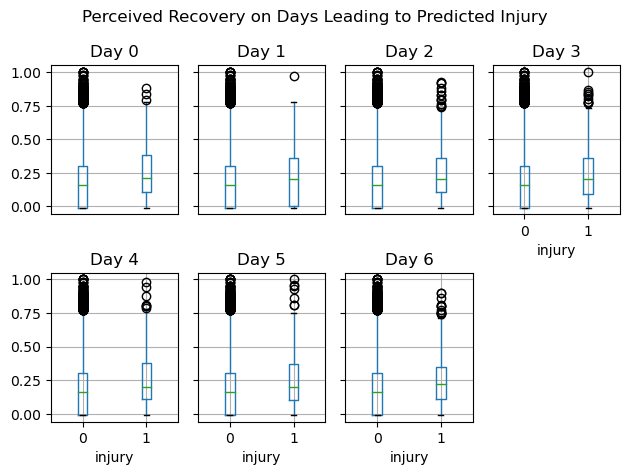

In [160]:
fig, ax = plt.subplots(2, 4, sharey='row')
i = 0
for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "perceived recovery" + suffix
    day_data.boxplot(column=col, by='injury', ax=ax.flatten()[i])
    ax.flatten()[i].title.set_text(f'Day {i}')

    i = i + 1

ax[1,3].axis('off')
ax[0,0].set_xticks([])
ax[0,1].set_xticks([])
ax[0,2].set_xticks([])
ax[0,0].set_xlabel("")
ax[0,1].set_xlabel("")
ax[0,2].set_xlabel("")

plt.suptitle('Perceived Recovery on Days Leading to Predicted Injury')
plt.tight_layout()

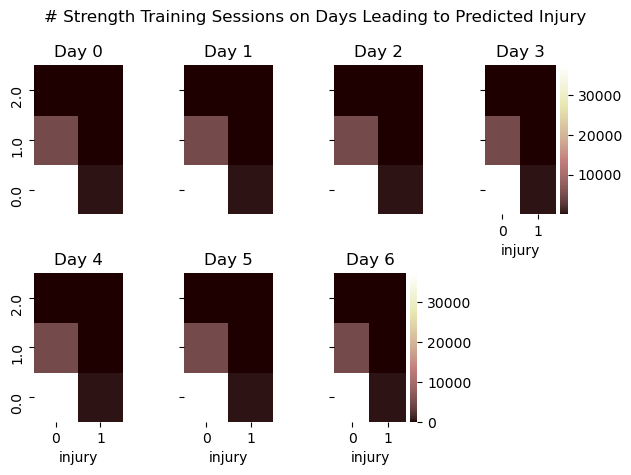

In [161]:
fig, ax = plt.subplots(2, 4, sharey='row')
i = 0
for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "strength training" + suffix
    injury_strength_count = day_data[[col, 'injury']].groupby(
    [col, 'injury']).size().unstack(-1).fillna(0)
    if i in [3, 6]:
        sns.heatmap(injury_strength_count, cmap='pink', ax=ax.flatten()[i])
    else:
        sns.heatmap(injury_strength_count, cmap='pink', ax=ax.flatten()[i], cbar=False)
    ax.flatten()[i].title.set_text(f'Day {i}')
    ax.flatten()[i].set_ylabel("")
    ax.flatten()[i].invert_yaxis()
    i += 1

ax[1,3].axis('off')
ax[0,0].set_xticks([])
ax[0,1].set_xticks([])
ax[0,2].set_xticks([])
ax[0,0].set_xlabel("")
ax[0,1].set_xlabel("")
ax[0,2].set_xlabel("")
plt.suptitle('# Strength Training Sessions on Days Leading to Predicted Injury')
plt.tight_layout()

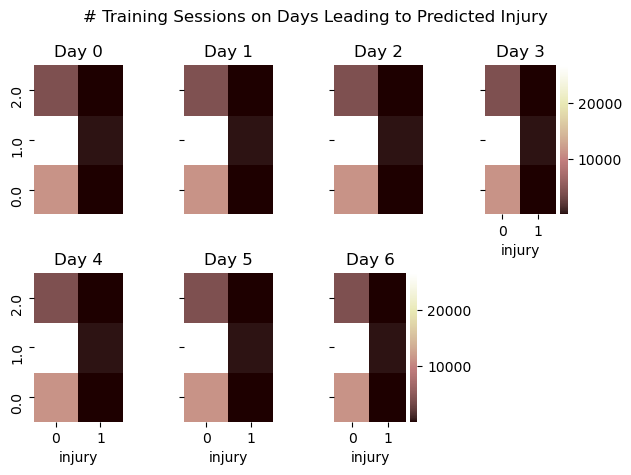

In [162]:
fig, ax = plt.subplots(2, 4, sharey='row')
i = 0
for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "nr. sessions" + suffix
    injury_session_count = day_data[[col, 'injury']].groupby(
    [col, 'injury']).size().unstack(-1).fillna(0)
    if i in [3, 6]:
        sns.heatmap(injury_session_count, cmap='pink', ax=ax.flatten()[i])
    else:
        sns.heatmap(injury_session_count, cmap='pink', ax=ax.flatten()[i], cbar=False)
    ax.flatten()[i].title.set_text(f'Day {i}')
    ax.flatten()[i].set_ylabel("")
    ax.flatten()[i].invert_yaxis()
    i += 1

ax[1,3].axis('off')
ax[0,0].set_xticks([])
ax[0,1].set_xticks([])
ax[0,2].set_xticks([])
ax[0,0].set_xlabel("")
ax[0,1].set_xlabel("")
ax[0,2].set_xlabel("")
plt.suptitle('# Training Sessions on Days Leading to Predicted Injury')
plt.tight_layout()

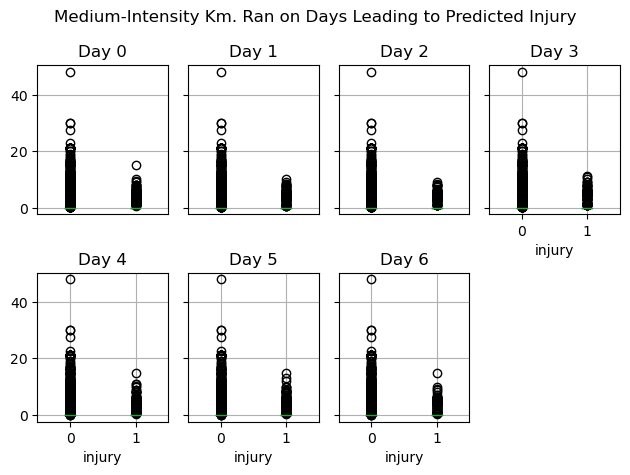

In [163]:

fig, ax = plt.subplots(2, 4, sharey='row')
i = 0
for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "km medium-intensity" + suffix
    day_data.boxplot(column=col, by='injury', ax=ax.flatten()[i])
    ax.flatten()[i].title.set_text(f'Day {i}')

    i = i + 1

ax[1,3].axis('off')
ax[0,0].set_xticks([])
ax[0,1].set_xticks([])
ax[0,2].set_xticks([])
ax[0,0].set_xlabel("")
ax[0,1].set_xlabel("")
ax[0,2].set_xlabel("")

plt.suptitle('Medium-Intensity Km. Ran on Days Leading to Predicted Injury')
plt.tight_layout()


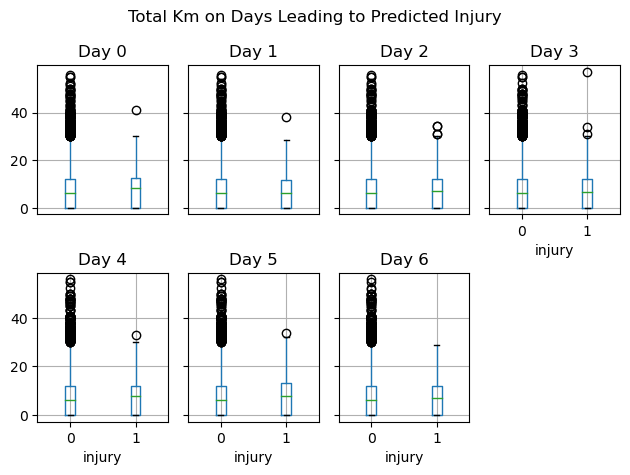

In [164]:
fig, ax = plt.subplots(2, 4, sharey='row')
i = 0
for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "total km" + suffix
    day_data.boxplot(column=col, by='injury', ax=ax.flatten()[i])
    ax.flatten()[i].title.set_text(f'Day {i}')

    i = i + 1

ax[1,3].axis('off')
ax[0,0].set_xticks([])
ax[0,1].set_xticks([])
ax[0,2].set_xticks([])
ax[0,0].set_xlabel("")
ax[0,1].set_xlabel("")
ax[0,2].set_xlabel("")

plt.suptitle('Total Km on Days Leading to Predicted Injury')
plt.tight_layout()


---
### Using SVD to plot the two most predictive Components:

In [165]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(sig_features)

In [166]:
svd = TruncatedSVD(n_components=10, random_state=17)
svd_matrix = svd.fit_transform(scaled_features)
svd_matrix.shape

(42766, 10)

Text(0.5, 1.0, '% data explained vs. Component Index #')

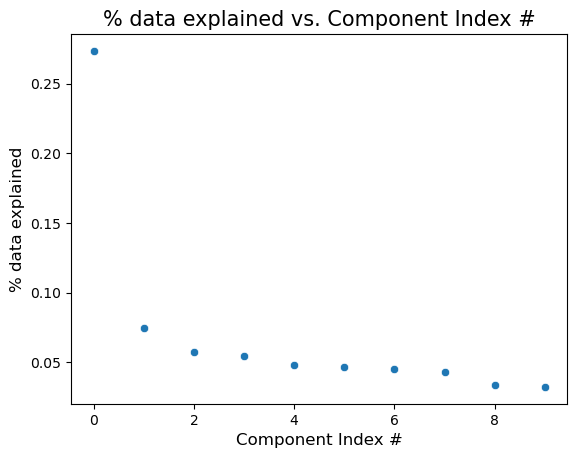

In [167]:
sns.scatterplot(x=range(0,10), y=svd.explained_variance_ratio_)
plt.ylabel('% data explained', fontsize=12)
plt.xlabel('Component Index #', fontsize=12)
plt.title('% data explained vs. Component Index #', fontsize=15)

Text(0.5, 1.0, '2nd vs. 1st Highest Explained Variance Components')

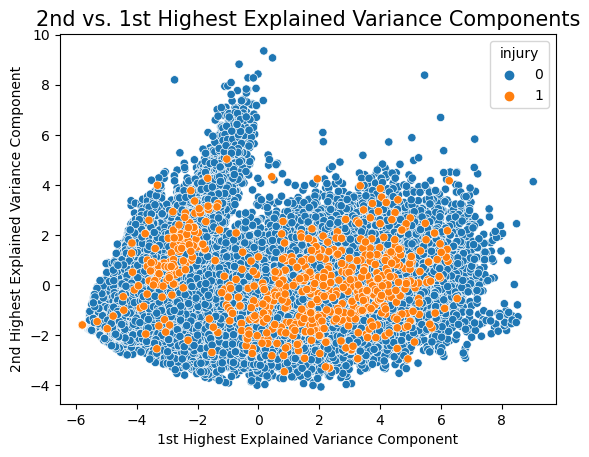

In [168]:
sns.scatterplot(x=svd_matrix[:,0], y=svd_matrix[:,1], hue=day_data['injury'])
plt.ylabel('2nd Highest Explained Variance Component', fontsize=10)
plt.xlabel('1st Highest Explained Variance Component', fontsize=10)
plt.title('2nd vs. 1st Highest Explained Variance Components', fontsize=15)